In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# import libraries for model validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

import os


C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
os.chdir('C:/Users/Eric/Desktop/Simplilearn/Machine Learning/Mercedes benz project')

In [3]:
#load the training and test datasets.
merc_train = pd.read_csv('train.csv')
merc_test = pd.read_csv('test.csv')


## Exploaratory visualization

In [4]:
pd.set_option('display.max_columns',500)

In [5]:
merc_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [6]:
merc_train.shape

(4209, 378)

In [7]:
merc_train.size

1591002

In [8]:
merc_train.dtypes.head(20)

ID       int64
y      float64
X0      object
X1      object
X2      object
X3      object
X4      object
X5      object
X6      object
X8      object
X10      int64
X11      int64
X12      int64
X13      int64
X14      int64
X15      int64
X16      int64
X17      int64
X18      int64
X19      int64
dtype: object

- The columns X0 to X8 are categorical.

- The columns X10 to X385 are numerical(binary) - presence/absence of a car feature.

- The objective is to predict y(car testing time.).

- Unique values of the remaining integers we find out that they are binary variables.

In [9]:
merc_train.columns[10:]

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

In [10]:
np.unique(merc_train[merc_train.columns[10:]])
#Here we verified that the columns X10 to X385 are binary.

array([0, 1], dtype=int64)

In [11]:
merc_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

## Check for Null values

In [12]:
merc_train.isnull().sum() #Thus looking at the observations we don not have null 
#values in this dataset.

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

## Distribution of y(target) - histogram,normality test, outliers.

'y' is the variable we need to predict so let us do some analysis on the variable first.

In [13]:
merc_train['y'].describe()
#Looking at the below observations we can see the minimum, maximum and average 
#taken by a car for testing.

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

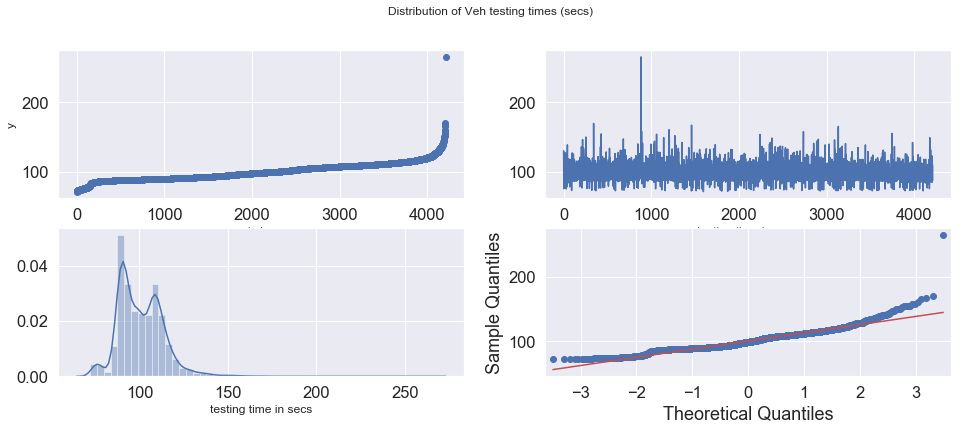

In [14]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(16,6))

fig.suptitle('Distribution of Veh testing times (secs)',fontsize = 12)

ax1.scatter(range(merc_train.shape[0]), np.sort(merc_train.y.values))
ax1.set_xlabel('index',fontsize=12)
ax1.set_ylabel('y',fontsize=12)

ax2.plot(merc_train['y']);
ax2.set_xlabel('testing time in secs',fontsize=12)

sns.distplot(merc_train.y.values, bins=50, kde=True, ax=ax3)
ax3.set_xlabel('testing time in secs', fontsize = 12)

##q-q plot 
qqplot(merc_train['y'],line='s',ax=ax4);

#So from the below plots we can see that y is not normally distributed,which is not really
#a problem since the response varible does not really need to be normally distributed.

There are several conclusions to be drawn from this histogram (testing time)

- The majority of test durations are between 90 and 100 seconds.
- There are peaks in testing times around 97-98 seconds and near 108 seconds.
- The testing times are bi-modal, with two distinct peaks.
- This data is positively skewed, with a long tail stretching into the upper vaues.

A perfect match for the distribution will be shown by a line of dots on a 45 degree angle from the bottom left of the plot to the top right.Often a line is drawn on the plot to make this expectation clear.

Deviations by the dots from the line shows a deviation from the expected distribution.

> Vehicle testing times do NOT seem to be normally distributed which is not an issue for modelling.

## type of columns

Let us have a look at the datatypes of all the variables present in the Dataset.

In [15]:
dtype_df = merc_train.dtypes.reset_index()

In [16]:
dtype_df.head()

,index,0
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object


In [17]:
dtype_df.columns = ['Count','Column Type']

In [18]:
dtype_df.head()

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object


In [19]:
dtype_df = merc_train.dtypes.reset_index()

dtype_df.columns = ['Count','Column type']
dtype_df.groupby('Column type').aggregate('count').reset_index()

,Column type,Count
0,int64,369
1,float64,1
2,object,8


## Analyze the column types - Train

In [20]:
numerics = ['int16','int32','int64','float16','float32','float64']
objects = ['O']

In [21]:
merc_train_num = merc_train.select_dtypes(include=numerics)
merc_train_cat = merc_train.select_dtypes(include=objects)

In [22]:
merc_train_num.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9

In [23]:
merc_train_cat.head()


,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [24]:
print(merc_train_num.shape,merc_train_cat.shape)

print('----------------------------------------------------------------------------')
print(merc_train_cat.columns)

print('----------------------------------------------------------------------------')
print(merc_train_num.columns)

(4209, 370) (4209, 8)
----------------------------------------------------------------------------
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
----------------------------------------------------------------------------
Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


## Analyze the column types - Test

In [25]:
merc_test_num = merc_test.select_dtypes(include=numerics)
merc_test_cat = merc_test.select_dtypes(include=objects)

In [26]:
merc_test_num.head()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,

In [27]:
merc_test_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [28]:
print(merc_test_num.shape,merc_test_cat.shape)

print('---------------------------------------------------------------')
print(merc_test_num.columns)

print('---------------------------------------------------------------')
print(merc_test_cat.columns)

(4209, 369) (4209, 8)
---------------------------------------------------------------
Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=369)
---------------------------------------------------------------
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


## Looking into each categorical feature - train

In [29]:
#Checking the number of distinct(unique) values in each categorical features of the training set.
for col_name in merc_train_cat.columns:
    print('The unique values in '+col_name+' are:',merc_train_cat[col_name].nunique())
    print(merc_train_cat[col_name].unique())
    print('------------------------------------------------------------------------------------')

The unique values in X0 are: 47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
------------------------------------------------------------------------------------
The unique values in X1 are: 27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
------------------------------------------------------------------------------------
The unique values in X2 are: 44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
------------------------------------------------------------------------------------
The unique values in X3 are: 7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
------------------------------------------------------------

## Looking into each categorical feature - test

In [30]:
#Checking the number of distinct(unique) values in each categorical features of the testing set.
#Sometimes we have more unique values in the test than the train data which is a problem.
for col_name in merc_test_cat.columns:
    print('The unique values in '+col_name+' are:',merc_test_cat[col_name].nunique())
    print(merc_test_cat[col_name].unique())
    print('------------------------------------------------------------------------------------')
    
#The unique values in the features of the training set and testing set 
#do not match so thus we need to combine train and test data. 
#After combining we can apply getdummies to the combined dataset,
#so that we can further apply various ML algos.

The unique values in X0 are: 49
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
------------------------------------------------------------------------------------
The unique values in X1 are: 27
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
------------------------------------------------------------------------------------
The unique values in X2 are: 45
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
------------------------------------------------------------------------------------
The unique values in X3 are: 7
['f' 'a' 'c' 'e' 'd' 'g' 'b']
-------------------------------------------

** Observation **

Appears to be the categorical values in the training/testing are not the same. Some of the categorical values in the training set are not in the training set.

- The unique values in X0 are: 47(train)
- The unique values in X0 are: 49(test)

- The unique values in X2 are: 44
- The unique values in X2 are: 45

- The unique values in X5 are: 29
- The unique values in X5 are: 32

## Analyze the testing time for each of the cat columns

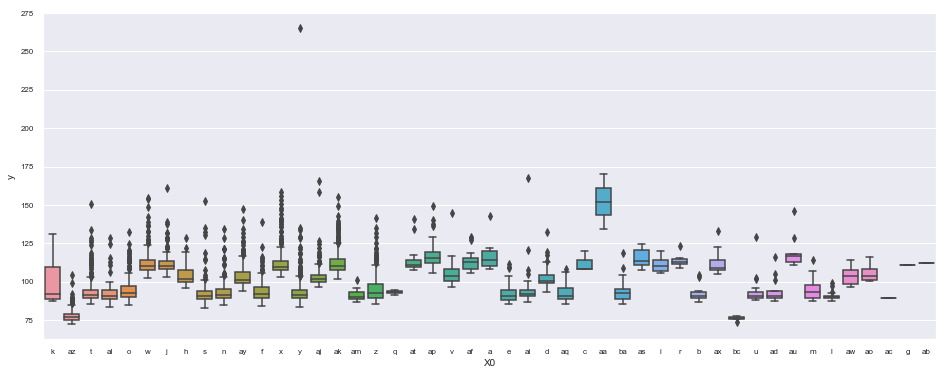

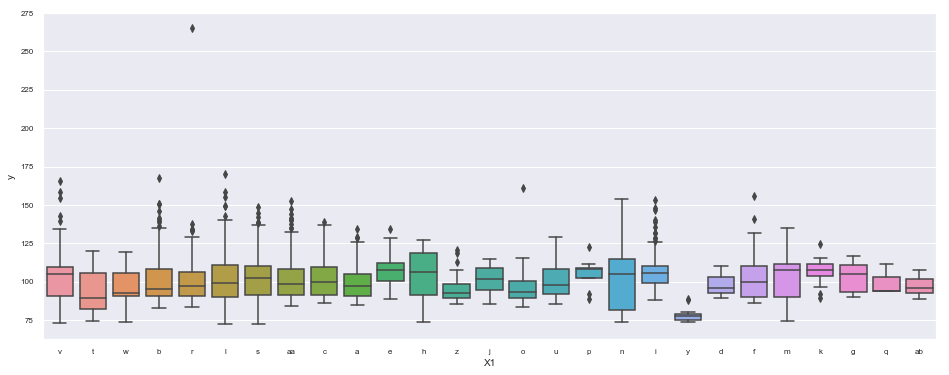

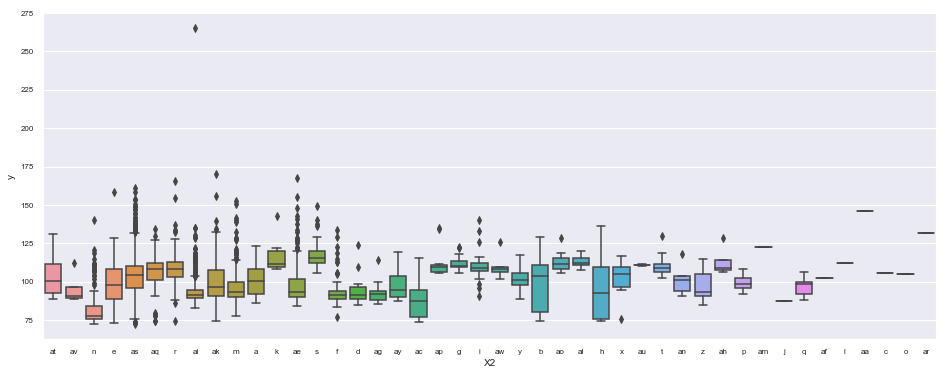

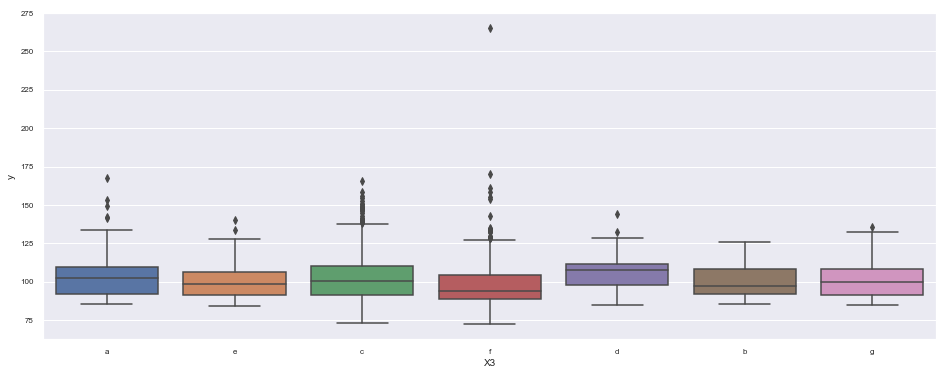

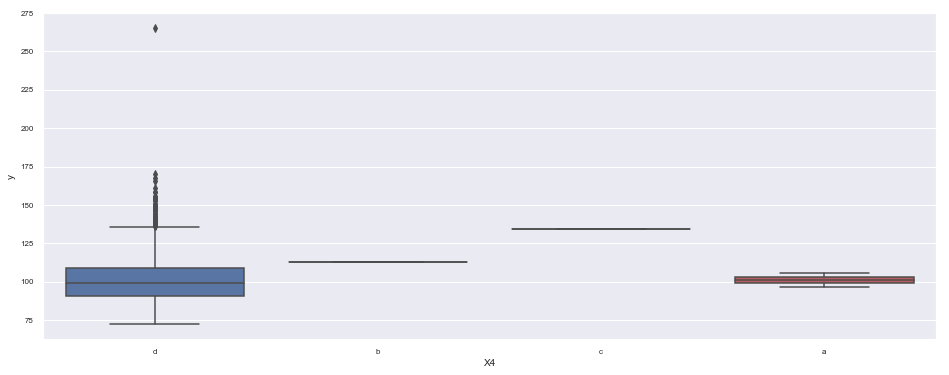

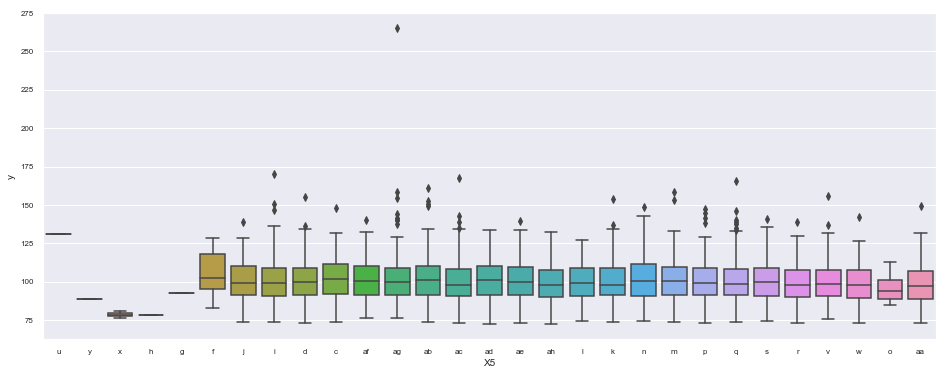

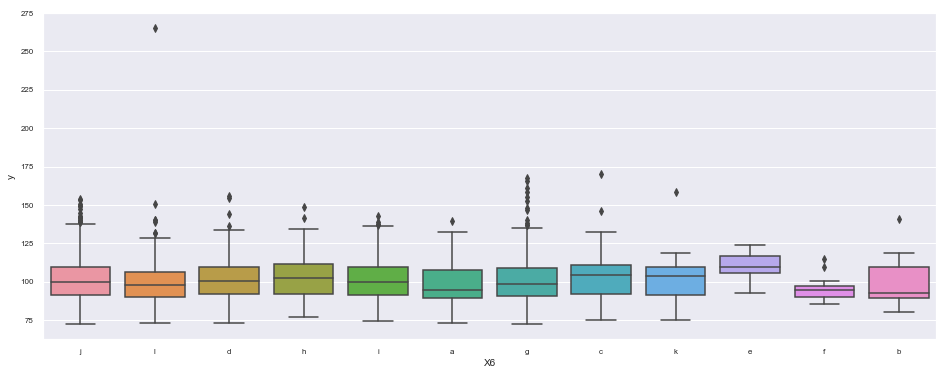

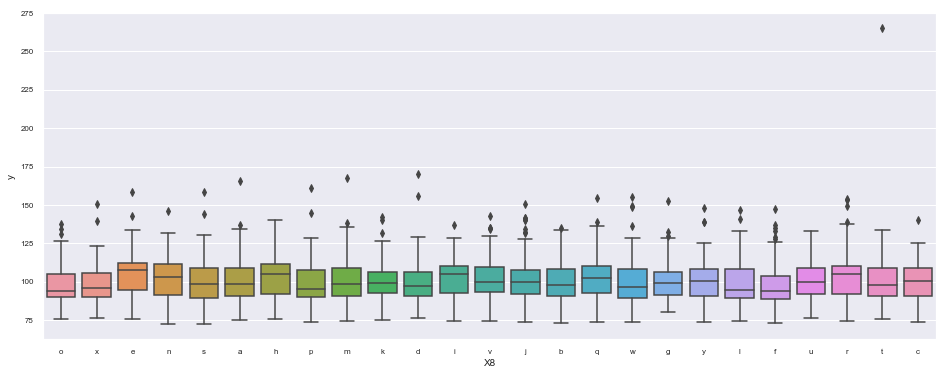

In [31]:
#value of y change for each of X0,X1.....
cols = ['X0','X1','X2','X3','X4','X5','X6','X8']

for col in cols:
    plt.figure(figsize=(16, 6))
    
    sns.boxplot(x=col, y='y',data=merc_train)
    
    plt.xlabel(col, fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

## Observation.

 1.column X0,X1,X3 seem to have high variance and are good predictors for testing time.(Since the mean response time for each category is different(which is good for prediction) as we can see in the boxplots.)
 
### Check if the categorical predictors(X0,X1....X8) have a strong relationship with the target variable y.


In [32]:
merc_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [34]:
model = ols('y ~ C(X0)',data = merc_train).fit()

In [35]:
print('F-statistic : ',model.fvalue)
print('p-value : ',model.f_pvalue)


F-statistic :  122.31407564900329
p-value :  0.0


In [36]:
anova_table = sm.stats.anova_lm(model,typ = 2) #typ = 2, there are 3 types of sum of squares that we use.
                                               #typically we use type 2. 
anova_table

#Similarly we can check the p-value for all the columns to check whether their values wrt y are signifiantly different.

,sum_sq,df,F,PR(>F)
C(X0),388859.137802,46.0,122.314076,0.0
Residual,287647.176541,4162.0,NaN,NaN


## Interpretation:

The P-value obtained from anova analysis is significant(P<0.05),therefore null is rejected and we conclude that there is a significant difference among treatments.

In [37]:
#Checking for X1:
model = ols('y ~ C(X1)',data = merc_train).fit()
print('F-statistic : ',model.fvalue)
print('p-value : ',model.f_pvalue)

F-statistic :  6.988434069498666
p-value :  1.1280321132765185e-24


In [38]:
anova_table = sm.stats.anova_lm(model,typ = 2) #typ = 2, there are 3 types of sum of squares that we use.
                                               #typically we use type 2. 
anova_table

,sum_sq,df,F,PR(>F)
C(X1),28168.924142,26.0,6.988434,1.128032e-24
Residual,648337.390201,4182.0,NaN,NaN


## Interpretation:

The P-value obtained from anova analysis is significant(P>0.05),therefore null is accepted and we conclude that there is no significant difference among treatments.Which means X1 has low varaince and thus does not contribute much towards prediction.

In [39]:
#Checking for X2:
model = ols('y ~ C(X2)',data = merc_train).fit()
print('F-statistic : ',model.fvalue)
print('p-value : ',model.f_pvalue)

F-statistic :  28.25699485880819
p-value :  1.9306837593625495e-196


In [40]:
anova_table = sm.stats.anova_lm(model,typ = 2) #typ = 2, there are 3 types of sum of squares that we use.
                                               #typically we use type 2. 
anova_table

,sum_sq,df,F,PR(>F)
C(X2),152784.714860,43.0,28.256995,1.930684e-196
Residual,523721.599483,4165.0,NaN,NaN


## Interpretation:

The P-value obtained from anova analysis is significant(P>0.05),therefore null is accepted and we conclude that there is no significant difference among treatments.Which means X2 has low varaince and thus does not contribute much towards prediction.

In [41]:
#Checking for X3:
model = ols('y ~ C(X3)',data = merc_train).fit()
print('F-statistic : ',model.fvalue)
print('p-value : ',model.f_pvalue)

F-statistic :  30.99174679531965
p-value :  1.251232512373457e-36


In [42]:
anova_table = sm.stats.anova_lm(model,typ = 2) #typ = 2, there are 3 types of sum of squares that we use.
                                               #typically we use type 2. 
anova_table

,sum_sq,df,F,PR(>F)
C(X3),28668.663183,6.0,30.991747,1.251233e-36
Residual,647837.651160,4202.0,NaN,NaN


## Interpretation:

The P-value obtained from anova analysis is significant(P>0.05),therefore null is accepted and we conclude that there is no significant difference among treatments.Which means X3 has low varaince and thus does not contribute much towards prediction.

In [43]:
#Checking for X4:
model = ols('y ~ C(X4)',data = merc_train).fit()
print('F-statistic : ',model.fvalue)
print('p-value : ',model.f_pvalue)

F-statistic :  2.618896521372272
p-value :  0.049209196304656685


In [44]:
anova_table = sm.stats.anova_lm(model,typ = 2) #typ = 2, there are 3 types of sum of squares that we use.
                                               #typically we use type 2. 
anova_table

,sum_sq,df,F,PR(>F)
C(X4),1261.638003,3.0,2.618897,0.049209
Residual,675244.676340,4205.0,NaN,NaN


## Interpretation:

The P-value obtained from anova analysis is significant(P<0.05),therefore null is rejected and we conclude that there is a significant difference among treatments.Which means X4 has high varaince and thus does contribute towards prediction and is an important variable.

In [45]:
#Checking for X5:
model = ols('y ~ C(X5)',data = merc_train).fit()
print('F-statistic : ',model.fvalue)
print('p-value : ',model.f_pvalue)

F-statistic :  2.152702885496927
p-value :  0.00040358469657987594


In [46]:
anova_table = sm.stats.anova_lm(model,typ = 2) #typ = 2, there are 3 types of sum of squares that we use.
                                               #typically we use type 2. 
anova_table

,sum_sq,df,F,PR(>F)
C(X5),9616.563103,28.0,2.152703,0.000404
Residual,666889.751240,4180.0,NaN,NaN


## Interpretation:

The P-value obtained from anova analysis is significant(P<0.05),therefore null is rejected and we conclude that there is a significant difference among treatments.Which means X5 has high varaince and thus does contribute towards prediction and is an important variable.

In [47]:
#Checking for X6:
model = ols('y ~ C(X6)',data = merc_train).fit()
print('F-statistic : ',model.fvalue)
print('p-value : ',model.f_pvalue)

F-statistic :  4.1750460361125
p-value :  3.6159365940001084e-06


In [48]:
anova_table = sm.stats.anova_lm(model,typ = 2) #typ = 2, there are 3 types of sum of squares that we use.
                                               #typically we use type 2. 
anova_table

,sum_sq,df,F,PR(>F)
C(X6),7322.517216,11.0,4.175046,0.000004
Residual,669183.797127,4197.0,NaN,NaN


## Interpretation:

The P-value obtained from anova analysis is significant(P>0.05),therefore null is accepted and we conclude that there is no significant difference among treatments.Which means X6 has low varaince and thus does not contribute much towards prediction.

In [49]:
#Checking for X8:
model = ols('y ~ C(X8)',data = merc_train).fit()
print('F-statistic : ',model.fvalue)
print('p-value : ',model.f_pvalue)

F-statistic :  5.030918412130861
p-value :  1.2692541091299133e-14


In [50]:
anova_table = sm.stats.anova_lm(model,typ = 2) #typ = 2, there are 3 types of sum of squares that we use.
                                               #typically we use type 2. 
anova_table

,sum_sq,df,F,PR(>F)
C(X8),18975.063535,24.0,5.030918,1.269254e-14
Residual,657531.250808,4184.0,NaN,NaN


## Interpretation:

The P-value obtained from anova analysis is significant(P>0.05),therefore null is accepted and we conclude that there is no significant difference among treatments.Which means X8 has low varaince and thus does not contribute much towards prediction.

From ANOVA analysis, we know that treatmeant differences are statistically significant, but ANOVA does not tell us which treatments 
are significantly different from each other.

To know the pairs of significant different treatments,we will perform multiple pairwise comparison (Post-hoc comparison) using Tukey HSD test.

In [51]:
#load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#perform multiple pairwise comparison (TukeyHSD)
m_comp = pairwise_tukeyhsd(endog=merc_train['y'],groups=merc_train['X4'],alpha=0.05)
print(m_comp)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  a      b      11.7   0.862  -28.1874 51.5874 False 
  a      c     32.94   0.1461 -6.9474  72.8274 False 
  a      d    -0.4417   0.9   -23.4762 22.5927 False 
  b      c     21.24   0.6199 -24.818   67.298 False 
  b      d    -12.1417 0.7474 -44.7135 20.4301 False 
  c      d    -33.3817 0.0421 -65.9535 -0.8099  True 
-----------------------------------------------------


In [52]:
merc_train_cat

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [53]:
#perform multiple pairwise comparison (TukeyHSD)
m_comp = pairwise_tukeyhsd(endog=merc_train['y'],groups=merc_train['X4'],alpha=0.05)
print(m_comp)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  a      b      11.7   0.862  -28.1874 51.5874 False 
  a      c     32.94   0.1461 -6.9474  72.8274 False 
  a      d    -0.4417   0.9   -23.4762 22.5927 False 
  b      c     21.24   0.6199 -24.818   67.298 False 
  b      d    -12.1417 0.7474 -44.7135 20.4301 False 
  c      d    -33.3817 0.0421 -65.9535 -0.8099  True 
-----------------------------------------------------


## Categorical Feature Selection (Using chi square tests)

Pearsons chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.

The results of this test can be used for feature selection,where those features that are independent of the target can be removed from the dataset.

In [54]:
#from sklearn.feature_selection import SelectKBest,chi2,f_regression

In [55]:
#features = merc_train.drop(['y'], axis=1)
#target = merc_train.y

In [56]:
#features = features[['X0']]

In [57]:
#fs = SelectKBest(score_func=f_regression, k='all')

## Outlier Detection/removal.

In [58]:
#Calculate Q1 (25th percentile of the data) for the given feature.
Q1 = np.percentile(merc_train.loc[:,'y'], 25)

#Calculate Q2 (50th percentile of the data) for the given feature.
Q2 = np.percentile(merc_train.loc[:,'y'], 50)

#Calculate Q3 (75th percentile of the data) for the given feature.
Q3 = np.percentile(merc_train.loc[:,'y'], 75)

#Use the interquartile range to calculate an outlier step (1.5 times the IQR.)
step = (Q3 - Q1) * 3

print('Q1 = {},Q2 = {},Q3 = {},outlier step value = {}'.format(Q1, Q2, Q3, step))



Q1 = 90.82,Q2 = 99.15,Q3 = 109.01,outlier step value = 54.570000000000036


In [59]:
outlier_lower_idx = merc_train[merc_train['y'] <= (Q1-step)].index
outlier_upper_idx = merc_train[merc_train['y'] > (Q3 + step)].index

In [60]:
no_lower_outliers = len(outlier_lower_idx)
no_upper_outliers = len(outlier_upper_idx)

print('Number of outliers in the lower extreme side = {}'.format(no_lower_outliers))
print('Number of outliers in the upper extreme side = {}'.format(no_upper_outliers))

print('lower outliers = {}%'.format(no_lower_outliers/merc_train.shape[0]*100))
print('Upper Outliers = {}%'.format(no_upper_outliers/merc_train.shape[0]*100))

Number of outliers in the lower extreme side = 0
Number of outliers in the upper extreme side = 4
lower outliers = 0.0%
Upper Outliers = 0.09503444998812069%


In [61]:
#Observe the severity of the outlier samples.
merc_train.iloc[outlier_upper_idx]['y'].sort_values(ascending=False)

883     265.32
342     169.91
1459    167.45
3133    165.52
Name: y, dtype: float64

In [62]:
#Only one outlier.
merc_train[merc_train.y >= 170]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


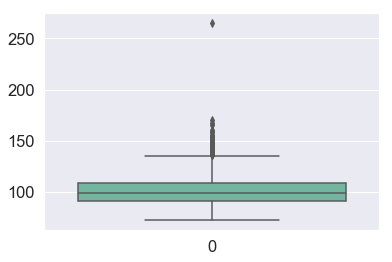

In [63]:
sns.boxplot(data=merc_train['y'], palette='Set2');

### Use pandas_profiling on the dataset.

In [64]:
import pandas_profiling as pp

In [65]:
%%time 
pp.ProfileReport(merc_train.drop(['y'],axis=1))

Wall time: 9min 44s


ImportError: cannot import name 'GridspecLayout' from 'ipywidgets' (C:\Users\Eric\Anaconda3\lib\site-packages\ipywidgets\__init__.py)

In [66]:
import ipywidgets
ipywidgets.__version__

'7.4.2'

## Using get_dummies to convert the categorical column values into numeric since most ML models accept only numeric data.

In [ ]:
merc_train.shape

In [ ]:
merc_train = pd.get_dummies(merc_train)

In [ ]:
merc_train

In [ ]:
#merc_train = merc_train.drop(['ID'],axis =1)

In [ ]:
#merc_train.head()

In [ ]:
#scaler = StandardScaler()

#scaler.fit(merc_train)

In [ ]:
#merc_train = scaler.transform(merc_train)

In [ ]:
#merc_train = pd.DataFrame(merc_train)

In [ ]:
#merc_train

In [ ]:
#Seperate features and target column.

In [ ]:
X_train1 = merc_train.drop(['y','ID'],axis=1)
y_train1 = merc_train.y


In [ ]:
y_train1 = np.array(y_train1)

In [ ]:
y_train1

In [ ]:
#Train-test split.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train1,
                                                 y_train1,
                                                 test_size=0.25,
                                                 random_state=4)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Perform linear Regression

In [ ]:
linreg = LinearRegression() 

In [ ]:
%%time 
#fit the data.
linreg.fit(X_train,y_train)

In [ ]:
#predict (training samples)
y_pred_tr = linreg.predict(X_train)


#predict (testing samples)
y_pred = linreg.predict(X_test)


In [ ]:
y_train.shape

In [ ]:
print('\nTraining score : ')
print('Mean squared error: %.2f'% mean_squared_error(y_train,y_pred_tr))
print('R2 score : %.2f' % r2_score(y_train,y_pred_tr))


print('\nTesting score : ')
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
print('R2 score : %.2f' % r2_score(y_test,y_pred))

## Random Forest

In [ ]:
#Instantaite the RF regressor.#Best params found from grid search.
rf_reg = RandomForestRegressor(n_estimators= 20, 
                               min_samples_split= 0.1, 
                               max_features= 'sqrt', 
                               max_depth= 12, 
                               criterion= 'mse')

In [ ]:
%%time
#fit the data
rf_reg.fit(X_train,y_train)

In [ ]:
%%time

#predict (training samples)
y_pred_tr = rf_reg.predict(X_train)

print('\nTraining score : ')
print('Mean squared error: %.2f'% mean_squared_error(y_train,y_pred_tr))
print('R2 score : %.2f' % r2_score(y_train,y_pred_tr))

#predict (testing samples)
y_pred = rf_reg.predict(X_test)


print('\nTesting score : ')
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
print('R2 score : %.2f' % r2_score(y_test,y_pred))


In [ ]:
%%time
kf = KFold(n_splits=10,random_state=100)

#instantiate the regressor.
rf_reg = RandomForestRegressor(n_estimators= 100, 
                                min_samples_split= 0.1, 
                                max_features='sqrt', 
                                max_depth= 20, 
                                criterion= 'mse')

kf_results = cross_val_score(estimator=rf_reg,
                              X=X_train1,
                              y=y_train1,
                              cv=kf,
                              scoring='neg_mean_squared_error')

print('Mean MSE : \n', -kf_results.mean())

In [ ]:
%%time
kf = KFold(n_splits=5,random_state=20)

scoring = {'r2':'r2',
          'MSE':'neg_mean_squared_error'}

#from grid search
#{n_estimators= 100,min_samples_split= 0.1, max_features='sqrt',max_depth= 20,criterion= 'mse'}
rf_reg = RandomForestRegressor(n_estimators= 100, 
                                min_samples_split= 0.1, 
                                max_features='sqrt', 
                                max_depth= 20, 
                                criterion= 'mse')

scores = cross_validate(estimator=rf_reg,
                        X=X_train1,
                        y=y_train1,
                        cv=kf,
                        scoring=scoring,
                        return_train_score=True)

print('Score keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['train_r2'].mean()))

print('Training MSE : {}'.format(scores['train_MSE'].mean()))
print('Testing MSE : {}'.format(scores['train_MSE'].mean()))



## after some grid search..


In [ ]:
rs = ShuffleSplit(n_splits=5, test_size=0.25,random_state=0)

scoring = {'R2':'r2','MSE': 'neg_mean_squared_error'}

params = dict( n_estimators = [10,20,50,80,200],
               criterion= ['mse'],
               max_depth= [6,8,10,12],
               max_features= ['sqrt', 'log2'],
               min_samples_split= [.10,.20,.40]) 

params
                                

In [ ]:
#instantiate the Grid search object.
gs = RandomizedSearchCV(estimator= RandomForestRegressor(),
                       param_distributions=params,
                       scoring=scoring,
                       #n_jobs=-1,
                       refit='MSE',
                       cv=rs,
                       return_train_score=True,
                       verbose=1)

In [ ]:
%%time
gs.fit(X_train1,y_train1)

In [ ]:
#retrieve the CV results.
results = gs.cv_results_

In [ ]:
print('Mean training MSE = {}'.format(results['mean_train_MSE'].mean()))
print('Mean testing MSE = {}'.format(results['mean_test_MSE'].mean()))
print('\n')
print('Mean training R2 = {}'.format(results['mean_train_R2'].mean()))
print('Mean testing R2 = {}'.format(results['mean_test_R2'].mean()))


In [ ]:
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

## Using KNN Regressor.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=17,
                          metric='hamming',
                          weights='distance',
                          algorithm='brute')

In [ ]:
#fit the data
knn.fit(X_train,y_train)

In [ ]:
%%time

#predict for training samples.
y_pred_tr = knn.predict(X_train)

print('\nTraining score : ')
print('Mean squared error: %.2f'% mean_squared_error(y_train,y_pred_tr))
print('R2 score : %.2f' % r2_score(y_train,y_pred_tr))

#predict for testing samples.
y_pred = knn.predict(X_test)

print('\nTesting score : ')
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
print('R2 score : %.2f' % r2_score(y_test,y_pred))

## using KNN with Grid Search

In [ ]:
clf = KNeighborsRegressor()

In [ ]:
n_neighbors = [3, 5, 7, 9, 11, 13, 15]
#Algos  =  ['ball_tree,'kd_tree','brute']
dist_metric = ['hamming','jaccard']
#p_root = [1,2,3,4]
weights = ['uniform','distance']
#leaf_size = [5, 15, 30, 40, 50, 60]

In [ ]:
#define the parameters
parameters = dict(
                    n_neighbors = n_neighbors,
                    #algorithm = algos,
                    metric = dist_metric,
                    #p = p_root,
                    weights = weights
                    #leaf_size = leaf_size
                  )

print(parameters)

In [ ]:
#define splits.
n_splits = 3 

kf = KFold(n_splits = n_splits,random_state = 100)
skf = StratifiedKFold(n_splits = n_splits, random_state = 100)


In [ ]:
#instantiate the grid search CV..
grid = RandomizedSearchCV(estimator = clf,
                       param_distributions = parameters,
                       scoring = 'r2',
                       cv = kf,
                       verbose = 2)

In [ ]:
#fit the data to the grid object.
grid.fit(X_train1,y_train1)

In [ ]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=11, metric='jaccard', weights= 'distance')

# fit the data
knn.fit(X_train, y_train)



In [ ]:
# predict (training samples)
y_pred_tr = knn.predict(X_train)

print("\nTraining score : ")
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_pred_tr))
print('R2 score: %.2f' % r2_score(y_train, y_pred_tr))

# predict (testing samples)
y_pred = knn.predict(X_test)

print("\nTesting score : ")
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))



## Adaboost regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

### Parameters:

#### base_estimator:
object,optional(default = None) If None then the base estimator is DecisionTreeRegressor(max_depth = 3)

#### n_estimators:
integer,optional(default = 50) The maximum number of estimators at which boosting is terminated. In case of perfect fit,the learning procedure is stopped early.


In [ ]:
#Create adaboost classifier object.
#since no base estimator is mentioned below,
#it will use decision tree as the base estimator.

abc= AdaBoostRegressor(n_estimators=500,
                      learning_rate=0.01
                      )

In [ ]:
abc.get_params()

In [ ]:
#Train Adaboost Regressor. (Adaboost is generally good for classification problems.)
abc.fit(X_train,y_train)

In [ ]:
%%time
kf = KFold(n_splits=5, random_state=20)

scoring = {'r2': 'r2',
           'MSE': 'neg_mean_squared_error'}

scores = cross_validate(estimator=abc,
                        X=X_train1,
                        y=y_train1,
                        cv=kf,
                        scoring=scoring,
                        return_train_score=True)

print('Score keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['train_r2'].mean()))

print('Training MSE : {}'.format(scores['train_MSE'].mean()))
print('Testing MSE : {}'.format(scores['train_MSE'].mean()))

In [ ]:
%%time
#Predict training samples.
y_pred_tr = abc.predict(X_train)

print("\nTraining metrics: ")
print('Mean Abs Error MAE : ',metrics.mean_absolute_error(y_train,y_pred_tr) )
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_pred_tr))
print('Root mean sq error RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr)))
print('R2 score: %.2f' % r2_score(y_train, y_pred_tr))

#Predict testing samples.
y_pred = abc.predict(X_test)

print("\nTesting metrics: ")
print('Mean Abs Error MAE : ',metrics.mean_absolute_error(y_test,y_pred) )
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('Root mean sq error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

## Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Fit regression model.
params = {'n_estimators' : 1500,
          'max_depth' : 4,
          'min_samples_split' : 2,
          'learning_rate' : 0.005,
          'loss' : 'ls'}

gbr = GradientBoostingRegressor(**params)

In [ ]:
#Train GB regressor.
gbr.fit(X_train,y_train)

In [ ]:
%%time
kf = KFold(n_splits=5, random_state=20)

scoring = {'r2': 'r2',
           'MSE': 'neg_mean_squared_error'}

scores = cross_validate(estimator=gbr,
                        X=X_train1,
                        y=y_train1,
                        cv=kf,
                        scoring=scoring,
                        return_train_score=True)

print('Score keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['train_r2'].mean()))

print('Training MSE : {}'.format(scores['train_MSE'].mean()))
print('Testing MSE : {}'.format(scores['train_MSE'].mean()))

In [ ]:
%%time
#Predict training samples.
y_pred_tr = gbr.predict(X_train)

print("\nTraining metrics: ")
print('Mean Abs Error MAE : ',metrics.mean_absolute_error(y_train,y_pred_tr) )
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_pred_tr))
print('Root mean sq error RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr)))
print('R2 score: %.2f' % r2_score(y_train, y_pred_tr))

#Predict training samples.
y_pred = gbr.predict(X_test)

print("\nTesting metrics: ")
print('Mean Abs Error MAE : ',metrics.mean_absolute_error(y_test,y_pred) )
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('Root mean sq error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Tuning GBM parameters

Many strategies exist on how to tune parameters.Most datascientist believe number of trees,tree depth and the learning rate as the most crucial parameters.

## Tuning n_estimators and Learning rate.

In [ ]:
metrics.SCORERS.keys()

In [ ]:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.005, loss='ls',
                          max_depth=4, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#%%time
#params = {'learning_rate': [0.15,0.1,0.05,0.01,0.005,0.001],
#          'n_estimators': [100,250,500,750,1000,1250,1500,1750]}

#gs = RandomizedSearchCV(estimator = GradientBoostingRegressor(max_leaf_nodes = None,
#                                                              max_features = 'sqrt',
#                                                              min_samples_split = 2,
#                                                              min_samples_leaf = 1,
#                                                              subsample=1,
#                                                              random_state=50,
#                                                              param_distributions = params,
#                                                              scoring = 'neg_mean_squared_error',
#                                                              n_jobs=4,
#                                                              iid=False,
#                                                              cv=5,
#                                                              )
                    


In [ ]:
#gs.fit(X_train,y_train)

# XGboost Regression model.

In [ ]:
#pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train1.shape

In [ ]:
y_train1.shape

In [ ]:
#train test split.
X_train,X_test,y_train,y_test = train_test_split(X_train1,
                                                 y_train1,
                                                 test_size=0.2,
                                                 random_state=4)

In [ ]:
#Creating DMatrices for Xgboost training.
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
mean_train = y_train.mean()

In [ ]:
#Get predictions on the test set.
baseline_predictions = np.ones(y_test.shape)*mean_train

In [ ]:
#Compute MAE.
mae_baseline = mean_absolute_error(y_test, baseline_predictions)


In [ ]:
print('Baseline MAE is {:.2f}'.format(mae_baseline))

In order to get an idea of the range of MAE we would like to acheive here,we are going to build a baseline model,and save its score for later.This score is what we can acheive with no efforts, so we hope we will beat it with our fancy algorithm.

That is, the prediction is,on average, 11.31 seconds off from the actual testing time.Is that good?

# The params dictionary.

In [ ]:
# Prepare dict of params for xgboost model.
xgb_params = {
   # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.01,
    'subsample': 1
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

# Parameters num_boost_round and early_stopping_rounds

The first parameter we look at is not a part of the params dictionary, but will be passed as a stand alone argument to the training method.

This parameter is called num_boost_round and corresponds to the number of boosting rounds or trees to build.Its optimal value highly depends on the other parameters,and thus it should be retuned each time you update a parameter.

Fortunately XGBoost provides a nice way to find the best number of rounds whilst training.Since trees are built sequentially, instead of fixing the number of rounds at the beginning,we can test our model at each step and see if adding a new tree/round improves performance.

To do so, we define a test dataset and a metric that is used to assess performance at each round.If performance hasnt improved for N rounds(N is defined by the variable early_stopping_rounds), we stop the training and keep the best number of boosting rounds.Lets see how to use it.

First we need to add the evaluation metric we are interested in, into our params dictionary.

   #### params['eval_metric'] = 'mae'
   
We still need to pass a num_boost_round which corresponds to the maximum number of boosting rounds that we allow.We set it to a large value hoping to find the optimal number of round before reaching it,if we havent improved performance on our test dataset in early_stopping_round rounds.

   #### num_boost_round = 999
   
In order to automatically find the best number of boosting rounds, we need to pass extra parameters on top of the params dictionary, the training DMatrix and num_boost_round.

   #### evals: a list of pairs (test_dmatrix, name_of_test). Here we will use our dtest DMatrix.
   
   #### early_stopping_rounds: The number of rounds without improvements after which we should stop,here we set it to 10.







   
  

In [ ]:
xgb_params['eval_metric'] = 'mae'
num_boost_round = 999

In [ ]:
model = xgb.train(
                  xgb_params,
                  dtrain,
                  num_boost_round=num_boost_round,
                  evals=[(dtest,'Test')],
                  early_stopping_rounds=10
                 )

In [ ]:
print('Best MAE: {:.2f} with {} rounds'.format(
                 model.best_score,
                 model.best_iteration+1))

As you can see we stopped before reaching the maximum number of boosting rounds,thats because after the 754 trees, adding more rounds did not lead to improvements of MAE on the test dataset.

Lets keep this MAE in mind for later, this is the MAE of our model with default parameters and an optimal number of boosting rounds,on the test dataset.

As you can see we are already beating the baseline.


# Using XGBoost's CV.

In order to tune the other hyperparameters we will use the cv function from XGBoost. It allows us to run cross validation on our training dataset and returns a mean MAE score.

We need to pass it:

- params: our dictionary of parameters.

- dtrain matrix.

- num_boost_round: number of boosting rounds.Here we will use a large number again and count o early_stopping_rounds to find the optimal number of rounds before reaching the maximum.

- seed: random seed. Its important to set a seed here, to ensure we are using the same folds for each step so we can properly compare the scores with different parameters.

- nfold: the number of folds to use for cross-validation.

- metrics: the metric to use to evaluate our model, here we use MAE.

In [ ]:
%%time
cv_results = xgb.cv(
                    xgb_params,
                    dtrain,
                    num_boost_round= num_boost_round,
                    seed= 42,
                    nfold= 5,
                    metrics={'mae'},
                    early_stopping_rounds= 10 #which means that after 10 iterations we are not getting any benefit here.
                    )


In [ ]:
cv_results

In [ ]:
cv_results['test-mae-mean'].min()

In [ ]:
%%time 
model = xgb.train(
                xgb_params,
                dtrain,
                num_boost_round=num_boost_round,
                evals=[(dtest,'Test')],
                early_stopping_rounds= 10
                )

In [ ]:
%%time
#Predict training samples.
y_pred_tr = model.predict(dtrain)

print("\nTraining metrics: ")
print('Mean Abs Error MAE : ',metrics.mean_absolute_error(y_train,y_pred_tr) )
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_pred_tr))
print('Root mean sq error RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr)))
print('R2 score: %.2f' % r2_score(y_train, y_pred_tr))

#Predict training samples.
y_pred = model.predict(dtest)

print("\nTesting metrics: ")
print('Mean Abs Error MAE : ',metrics.mean_absolute_error(y_test,y_pred) )
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('Root mean sq error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: %.2f' % r2_score(y_test, y_pred))